# BlueSky Post Cleaning
---
Author: Natalie Castro
Affiliation: University of Colorado at Boulder


The purpose of this notebook is to clean the data collected from BlueSky firehose API.


## 1. Environment Creation

### 1.1 Library Import

In [20]:
''' FILE ACCESS '''

import json
import os
import glob
import smart_open

''' DATA QUERYING '''

import regex as re
import pandas as pd
import datetime
from datetime import datetime


''' DATA VISUALIZATION '''

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### 1.2 Data Import

#### 1.2.1 January 6th

In [27]:
## Establishing a file path and then reading all of the files
data_filepath = (glob.glob(r'C:\Users\natal\OneDrive\university\research\data activism\bsky-scraper\data\6\*.jsonl'))

In [28]:
data_paths = []

for filepath in data_filepath:
    data_paths.append(filepath)

In [29]:
def file_opener(filepath):
    string_path = str(filepath)
    with open(string_path, 'r', encoding='utf-8') as file:
        data = [json.loads(line) for line in file]
        
    posts = pd.DataFrame(data)
    
    return (posts)

In [30]:
data = []
for path in data_paths:
    current_data = file_opener(path)
    
    data.append(current_data)

In [31]:
posts_sixth = pd.concat(data)

In [ ]:
posts_sixth.reset_index(inplace=True)
posts_sixth.drop(columns=['index','level_0'],inplace=True)

In [33]:
posts_sixth.head()

,index,text,created_at,author,uri,has_images,reply_to
0,0,Love the colors!,2025-01-03T21:26:00.035Z,nymariah.bsky.social,at://did:plc:3cecn7kmlhllm6ug3houu7pv/app.bsky...,False,at://did:plc:pt5amqef5q24raqv3dbqbevj/app.bsky...
1,1,,2024-05-24T13:44:15.000Z,mojobus.org.web.brid.gy,at://did:plc:2vso3nuha4i757bzmgea2jpi/app.bsky...,False,None
2,2,F apple then.,2025-01-03T21:25:59.906Z,dano66.bsky.social,at://did:plc:bsle3vlytf5dhmy5aw2uevt6/app.bsky...,False,at://did:plc:s2jiq5q6f5uhl7ywqbxtsvmu/app.bsky...
3,3,lowkey cannot wait to be in barcelona this spring,2025-01-03T21:26:00.221Z,malcomchance.bsky.social,at://did:plc:uvhnkwlg7wkmryoaytzxuhxn/app.bsky...,False,None
4,4,,2025-01-03T21:25:59.779Z,ricky22racer.bsky.social,at://did:plc:dv6bgew372gc4cm36djj7b6u/app.bsky...,False,at://did:plc:usbulziv4ck5omo2bf32hpc4/app.bsky...


In [2]:
climate_posts = pd.read_excel("Climate Posts - January 6th.xlsx")

In [5]:
climate_posts.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
climate_posts.head()

#### 1.2.2 January 9th

In [39]:
## Establishing a file path and then reading all of the files
data_filepath = (glob.glob(r'C:\Users\natal\OneDrive\university\research\data activism\bsky-scraper\data\9\*.jsonl'))

In [40]:
data_paths = []

for filepath in data_filepath:
    data_paths.append(filepath)

In [41]:
def file_opener(filepath):
    string_path = str(filepath)
    with open(string_path, 'r', encoding='utf-8') as file:
        data = [json.loads(line) for line in file]
        
    posts = pd.DataFrame(data)
    
    return (posts)

In [42]:
data = []
for path in data_paths:
    current_data = file_opener(path)
    
    data.append(current_data)

In [43]:
posts_ninth = pd.concat(data)

In [44]:
posts_ninth.reset_index(inplace=True)
posts_ninth.drop(columns=['index'],inplace=True)

In [ ]:
posts_ninth.head()

#### 1.2.3 January 20th

In [4]:
## Establishing a file path and then reading all of the files
data_filepath = (glob.glob(r'C:\Users\natal\OneDrive\university\research\data activism\bsky-scraper\data\20\*.jsonl'))

In [5]:
data_paths = []

for filepath in data_filepath:
    data_paths.append(filepath)

In [6]:
def file_opener(filepath):
    string_path = str(filepath)
    with open(string_path, 'r', encoding='utf-8') as file:
        data = [json.loads(line) for line in file]
        
    posts = pd.DataFrame(data)
    
    return (posts)

In [ ]:
data = []
for path in data_paths:
    current_data = file_opener(path)
    
    data.append(current_data)

posts_twenty = pd.concat(data)

posts_twenty.reset_index(inplace=True)
posts_twenty.drop(columns=['index'],inplace=True)



In [ ]:
posts_twenty.head()

### 1.3 Function Definition

In [10]:
def climate_finder(current_post):
    climate_pattern = "(climate)|(warming)|(greenhouse)|(emissions)|(resilience)|(carbon)|(sustainability)|(biodiversity)|(pollution)|(deforestation)|(renewable)|(extinction)|(mitigration)|(sea-level)|(fossil)|(drought)|(offsets)|(termperature)|(global warming)|(sustainable future)|(greenhouse gases)|(save the planet)|(ecofriendly)|(reduce, reuse, recycle)|(green revolution)|(earth)|(protect our planet)|(zero waste)|(future generations)|(SDG)|(going green)|(planet over profit)"
    post_matches = re.findall(climate_pattern,current_post)
    
    if len(post_matches) != 0:
        return(True)
    
    else:
        return (False)
    

In [11]:
def frame_filter(dataframe):
    
    climate_mask = []

    for post in range(0,len(dataframe)):
        current_post = dataframe.at[post,'text']

        match_result = climate_finder(current_post)
        climate_mask.append(match_result)
        
    climate_posts = dataframe[climate_mask].copy()
    climate_posts.reset_index(inplace=True)
    climate_posts.drop(columns=['index'],inplace=True)
    
    return(climate_posts)

## 2. Data Cleaning

### 2.1 January 6th

In [45]:
print (f"The total posts collected on January sixth were: {len(posts_sixth)}")

The total posts collected on January sixth were: 2211037


In [35]:
climate_posts = frame_filter(posts_sixth)

In [56]:
print (f"The total posts collected on January sixth that maybe about climate : {len(climate_posts)}")

The total posts collected on January sixth that maybe about climate : 7661


In [62]:
climate_posts.to_excel("Climate Posts - January 6th.xlsx")

In [ ]:
''' WRITING THE POSTS TO A CSV FOR COMPUTATIONAL TEXT ANALYSIS'''

In [36]:
climate_posts.drop_duplicates(subset=['text','author'],inplace=True)

In [37]:
    ## Removing any illegal characters 
climate_posts['text'] = climate_posts['text'].str.replace(r'[^\x00-\x7F]+', '', regex=True)  # Remove non-ASCII characters
climate_posts['text'] = climate_posts['text'].str.encode('utf-8', 'ignore').str.decode('utf-8')

In [38]:
climate_posts.to_csv("Climate Posts January 6th.csv")

### 2.2 January 9th 

In [13]:
print (f"The total posts collected on January sixth were: {len(posts_ninth)}")

The total posts collected on January sixth were: 5180797


In [46]:
climate_posts = frame_filter(posts_ninth)

In [17]:
climate_posts.drop_duplicates(subset=['text','author','uri'],inplace=True)

In [19]:
print (f"The total posts collected on January ninth that maybe about climate : {len(climate_posts)}")

The total posts collected on January ninth that maybe about climate : 34168


In [26]:
    ## Removing any illegal characters 
climate_posts['text'] = climate_posts['text'].str.replace(r'[^\x00-\x7F]+', '', regex=True)  # Remove non-ASCII characters
climate_posts['text'] = climate_posts['text'].str.encode('utf-8', 'ignore').str.decode('utf-8')

In [29]:
climate_posts.to_excel("Climate Posts January 9th.xlsx",engine='xlsxwriter')

In [ ]:
''' WRITING THE POSTS TO A CSV FOR COMPUTATIONAL TEXT ANALYSIS'''

In [47]:
climate_posts.drop_duplicates(subset=['text','author'],inplace=True)

In [48]:
    ## Removing any illegal characters 
climate_posts['text'] = climate_posts['text'].str.replace(r'[^\x00-\x7F]+', '', regex=True)  # Remove non-ASCII characters
climate_posts['text'] = climate_posts['text'].str.encode('utf-8', 'ignore').str.decode('utf-8')

In [49]:
climate_posts.to_csv("Climate Posts January 9th.csv")

### 2.3 January 20th 

In [12]:
print (f"The total posts collected on January 20th were: {len(posts_twenty)}")

The total posts collected on January 20th were: 3895565


In [13]:
climate_posts = frame_filter(posts_twenty)

In [14]:
climate_posts.drop_duplicates(subset=['text','author'],inplace=True)

In [16]:
print (f"The total posts collected on January 20th that maybe about climate : {len(climate_posts)}")

The total posts collected on January 20th that maybe about climate : 13199


In [17]:
    ## Removing any illegal characters 
climate_posts['text'] = climate_posts['text'].str.replace(r'[^\x00-\x7F]+', '', regex=True)  # Remove non-ASCII characters
climate_posts['text'] = climate_posts['text'].str.encode('utf-8', 'ignore').str.decode('utf-8')

In [19]:
climate_posts.to_csv("Climate Posts January 20th.csv")

## 3. Visualizations

In [52]:
''' SOURCE: GEEKS FOR GEEKS GENERATING WORD CLOUD PYTHON '''

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in climate_posts.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "



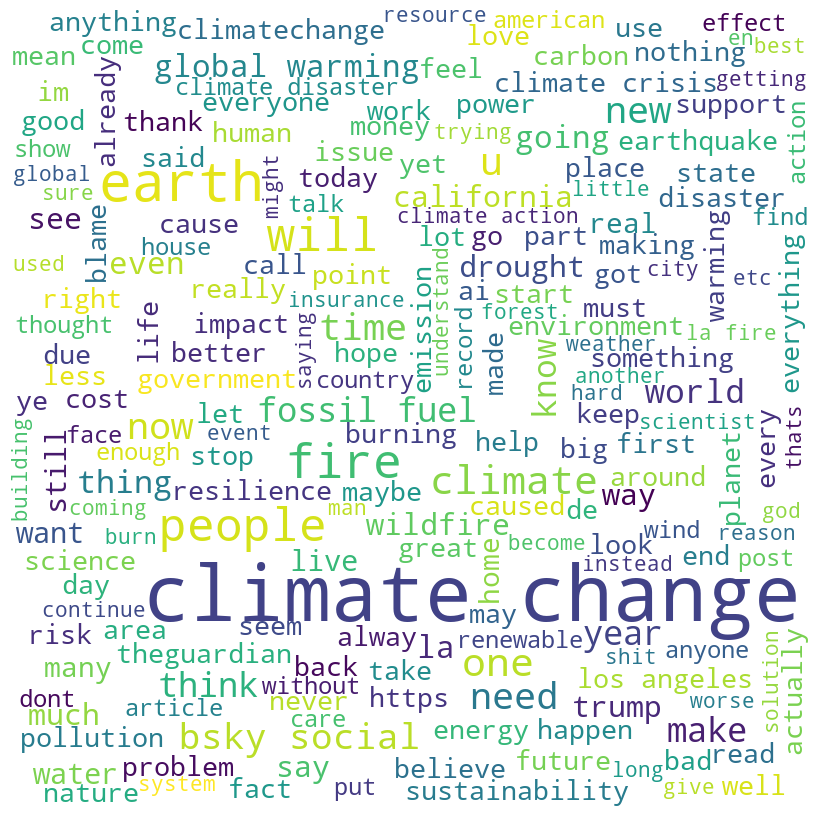

In [53]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()